In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [14]:
X_train[121].shape

(28, 28)

In [15]:
y_train[121]

0

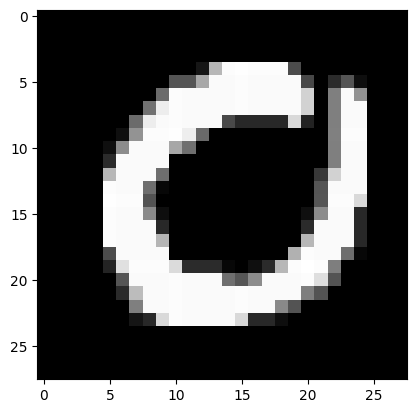

In [16]:
plt.imshow(X_train[121], cmap='gray')
plt.show()

In [17]:
X_train.shape

(60000, 28, 28)

In [18]:
y_train.shape

(60000,)

In [19]:
X_test.shape

(10000, 28, 28)

In [21]:
y_test.shape

(10000,)

In [23]:
np.unique(X_train[0])

array([  0,   1,   2,   3,   9,  11,  14,  16,  18,  23,  24,  25,  26,
        27,  30,  35,  36,  39,  43,  45,  46,  49,  55,  56,  64,  66,
        70,  78,  80,  81,  82,  90,  93,  94, 107, 108, 114, 119, 126,
       127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166,
       170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205,
       207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244,
       247, 249, 250, 251, 252, 253, 255], dtype=uint8)

In [24]:
X_train = X_train.reshape(X_train.shape[0], 28*28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28*28).astype('float32')
X_train = X_train/255
X_test = X_test/255

In [25]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [26]:
X_train.shape

(60000, 784)

In [28]:
X_train[0].shape

(784,)

# Model

In [29]:
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [30]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = model.fit(X_train, y_train, epochs=10,
                    batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 8s 5ms/step - loss: 0.2708 - accuracy: 0.9175 - val_loss: 0.1070 - val_accuracy: 0.9657
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1148 - accuracy: 0.9648 - val_loss: 0.0830 - val_accuracy: 0.9748
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0842 - accuracy: 0.9745 - val_loss: 0.0748 - val_accuracy: 0.9762
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0685 - accuracy: 0.9789 - val_loss: 0.0654 - val_accuracy: 0.9789
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0588 - accuracy: 0.9815 - val_loss: 0.0720 - val_accuracy: 0.9787
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0524 - accuracy: 0.9832 - val_loss: 0.0733 - val_accuracy: 0.9775
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0435 - accuracy: 0.9856 - val_loss: 0.0591 - val_accuracy: 0.9831
Epoch 

In [33]:
score = model.evaluate(X_test, y_test, batch_size=128)
score

79/79 [==============================] - 0s 5ms/step - loss: 0.0670 - accuracy: 0.9818


[0.0669773519039154, 0.9818000197410583]

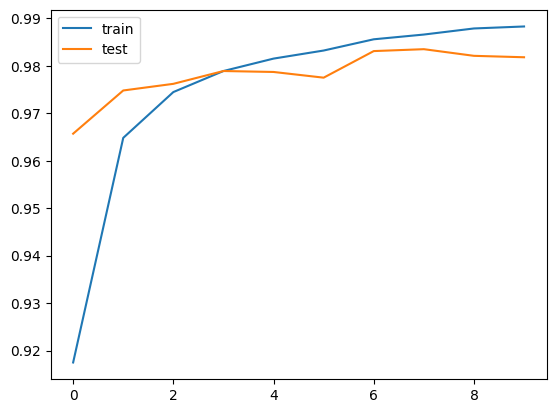

In [35]:
plt.plot(history.history['accuracy'], label ='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

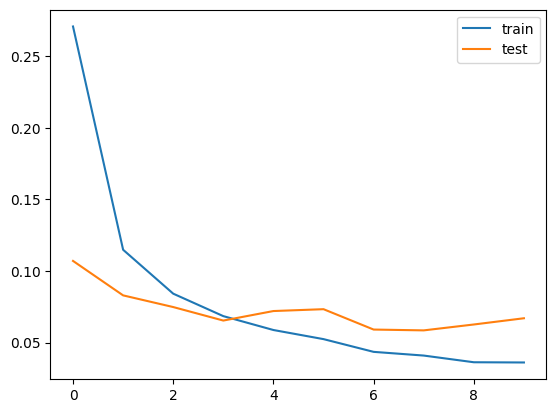

In [36]:
plt.plot(history.history['loss'], label ='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()